In [17]:
%run "../Pokemon EDA-Core.ipynb"

In [18]:
df = pd.DataFrame(data)

# Combine 'Type 1' and 'Type 2' into a single column
stacked_types = pd.concat([df['Type 1'], df['Type 2'].replace('None', '')]).dropna()

# Get the frequency of each combined type
type_frequencies = stacked_types.value_counts().reset_index(name='Frequency')
#type_frequencies.head()
#pokemon_effectiveness_df.stack()
df_type_effectiveness = pd.DataFrame(type_effectiveness_data)

# Set 'Attacking_Type' as the index
df_type_effectiveness.set_index('Attacking_Type', inplace=True)

#Transpose the dataframe because the data is structured from the perspective of the pokemon type receiving an attack,
#we want know where it has an advantage over the opposing type
df_atk_type_effectiveness = df_type_effectiveness.T


# Defense: Count the occurrences of 2 (Effective) and 0.5 (Non-Effective) for each attacking type vs. defending pokemon type by pokemon type
# Offense: add pokemon type advantage vs by same pokemon type
weakness_counts = (df_type_effectiveness.iloc[:, 1:] == 2).sum(1)
resistance_counts = (df_type_effectiveness.iloc[:, 1:] <= 0.5).sum(1)
atk_effective_counts = (df_atk_type_effectiveness == 2).sum(1)

# Combine the counts into a single DataFrame
counts_df = pd.DataFrame({
    '# of Weaknesses': weakness_counts,
    '# of Resistances': resistance_counts,
    '# of Advantages': atk_effective_counts
})

#df_type_effectiveness.loc['Fire']

# What is the distribution of Pokémon types?
In the realm of Pokémon battles, understanding the distribution of Pokémon types is paramount. Pokémon types encompass various elements or specializations that a Pokémon possesses, ranging from nature-based categories like fire, water, and ground to domain-based classifications such as fighting, ghost, and psychic. These typings play a crucial role, offering distinct advantages or disadvantages in battles against other Pokémon.

Considered the foundational principle of Pokémon battling, understanding Pokémon typings is indispensable. It provides a significant edge, transcending player skill and often becomes a decisive factor in determining victory. This understanding hinges on recognizing the dynamics of advantages and resistances in the interactions between attacking and defending Pokémon types.

"Advantages" are where the Attacking Pokémon Type delivers an effective attack, increased damage against the Defending Pokémon Type, "Resistances" are where the Defending Pokémon delivers an non-effective attack, reduced damage from the attacking Pokémon type.

For instance, 'Water' holds an advantage over 'Fire,' 'Fire' prevails against 'Grass,' and 'Grass' triumphs over 'Water.' Conversely, 'Water' resists 'Fire,' 'Fire' resists 'Grass,' and 'Grass' resists 'Water.' However, not all relationships between Pokémon types are symmetrical. Some interactions are unidirectional, like 'Ground' being effective against 'Fire' without resisting a 'Fire' attack.

## Visualizing the Relationships between Pokémon Types with Network Graphs
Network Graphs below visualize the relationships between Pokémon Types, separated into two charts to better visualize and space the content by direction of the effectiveness. 
Additionally, there are instances where a Pokémon type resists or is effective against itself, forming self-referential arrows in the network graphs. An intriguing case is the 'Normal' type, impacting only defensive prowess with a vulnerability to 'Fighting' and resistance to 'Ghost.' This distinction is evident in the network graphs where 'Normal' appears in 'Resistances' but not in 'Advantages.'

The visual representation in the "Comparison of Type Effectiveness by Pokémon Typings" charts reveals strategic insights. Pokémon types such as Steel, Dragon, and Fire emerge as formidable contenders due to their numerous resistances, providing a competitive advantage in battles. Conversely, typings like Ice and Rock are deemed vulnerable, showcasing a plethora of weaknesses compared to other Pokémon types.



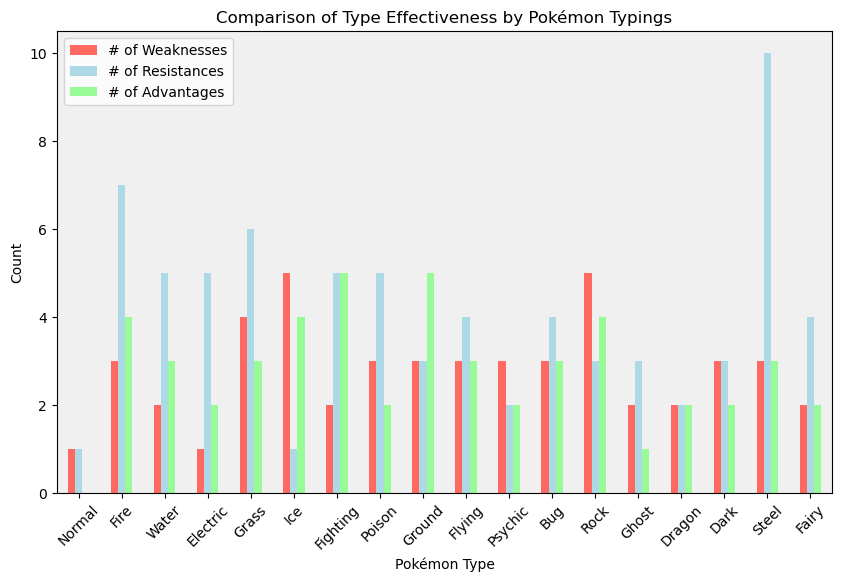

In [24]:


# Plot the bar graph
# Custom color palette with softer shades
soft_palette = sns.color_palette(['#FF6961', '#ADD8E6', '#98FB98'])
fig, ax = plt.subplots(figsize=(10, 6))
counts_df.plot(kind='bar', ax=ax, rot=45, color=soft_palette)
ax.set_facecolor('#F0F0F0')  # Set background color to a light gray

ax.set_title('Comparison of Type Effectiveness by Pokémon Typings')
ax.set_xlabel('Pokémon Type')
ax.set_ylabel('Count')
plt.show()

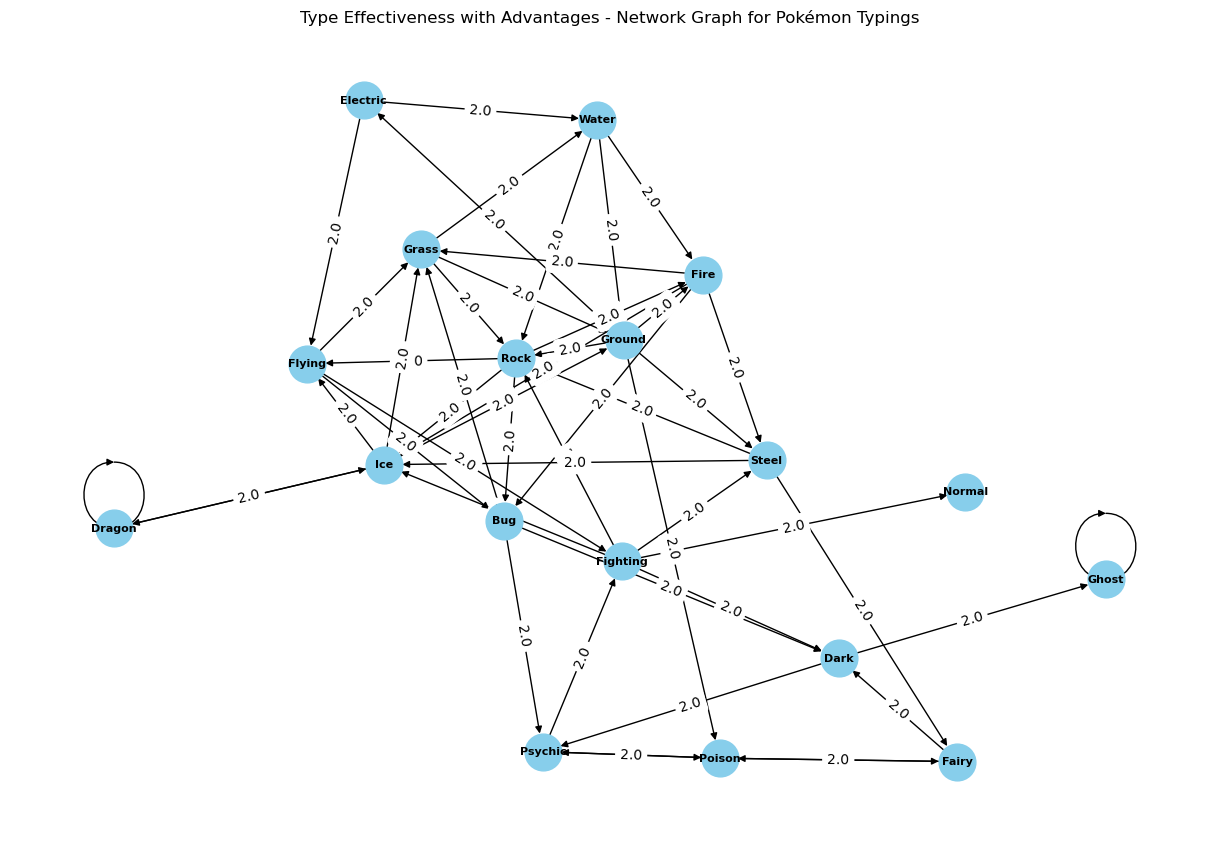

In [4]:

# Create a directed graph
G = nx.DiGraph()

# Add edges and nodes to the graph
for attacking_type in df_type_effectiveness.index:
    for defending_type, effectiveness in df_type_effectiveness.loc[attacking_type].items():
        if effectiveness == 2.0:  # Only add edges for non-neutral effectiveness
            G.add_edge(defending_type, attacking_type, weight=effectiveness)

# Use kamada_kawai_layout for better graph layout
pos = nx.kamada_kawai_layout(G)

# Plot the network graph with adjusted figure size
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

plt.title('Type Effectiveness with Advantages - Network Graph for Pokémon Typings')
plt.show()

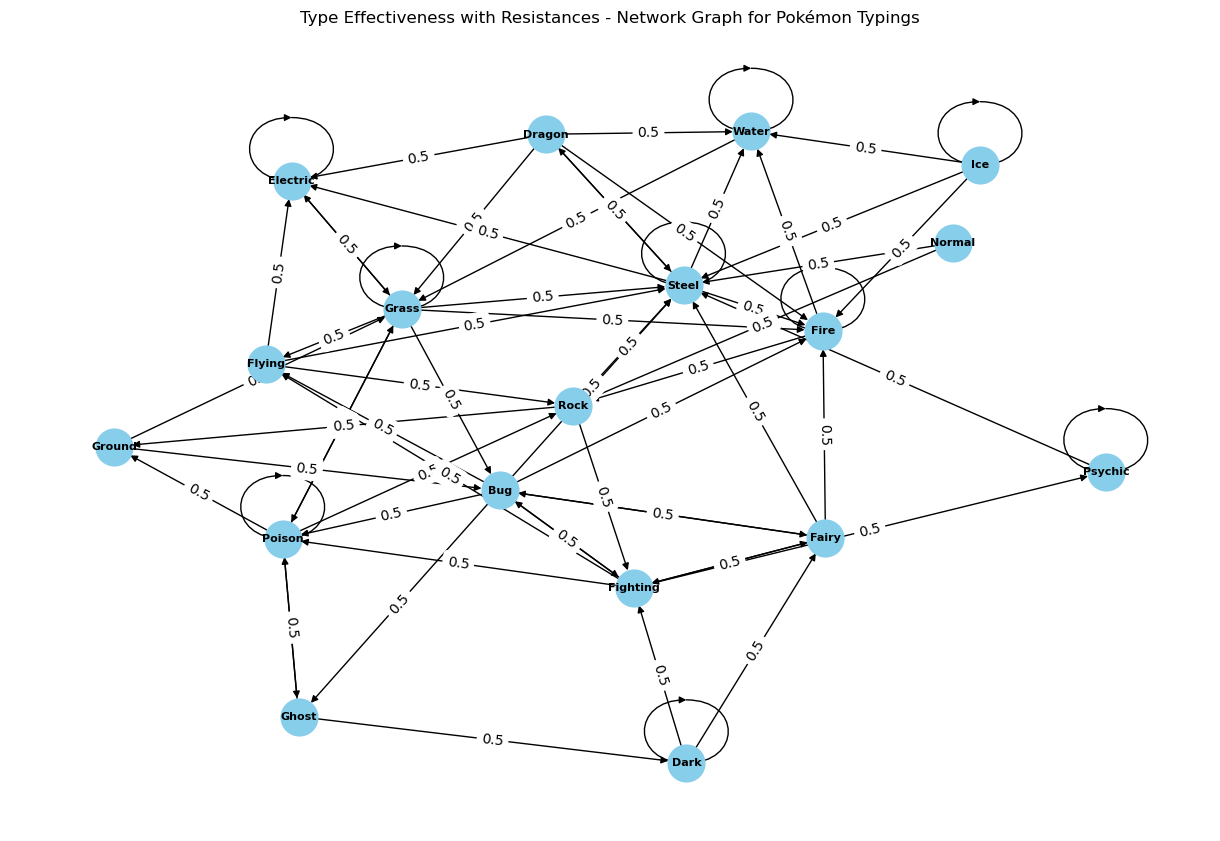

In [5]:
# Create a directed graph
G = nx.DiGraph()

# Add edges and nodes to the graph
for attacking_type in df_type_effectiveness.index:
    for defending_type, effectiveness in df_type_effectiveness.loc[attacking_type].items():
        if effectiveness == 0.5:  # Only add edges for non-neutral effectiveness
            G.add_edge(defending_type, attacking_type, weight=effectiveness)

# Use kamada_kawai_layout for better graph layout
#tried another graph and it was very condense and harder to see
pos = nx.kamada_kawai_layout(G)

# Plot the network graph with adjusted figure size
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

plt.title('Type Effectiveness with Resistances - Network Graph for Pokémon Typings')
plt.show()

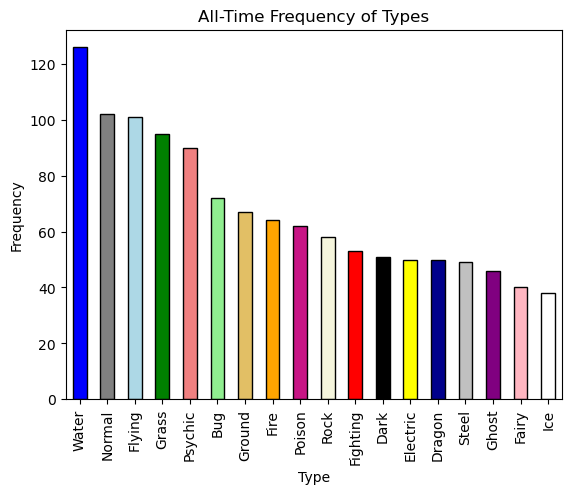

In [6]:
# Create a bar chart with custom colors and borders
type_frequencies.plot(kind='bar', x='index', y='Frequency', color=[type_colors.get(type, 'gray') for type in type_frequencies['index']], edgecolor='black')
plt.ylabel('Frequency')
plt.xlabel('Type')
plt.title('All-Time Frequency of Types')
plt.legend().set_visible(False)  # This line hides the legend - we are using the colors associated to the type
plt.show()

## Analyzing the Distribution of Pokémon Types Across Generations 1- with Stacked Charts and Treemaps6

In the expansive world of Pokémon spanning Generations 1 through 6, a trend emerges when it comes to the distribution of Pokémon types. Notably, the Water type stands out as the most prevalent among all Pokémon. This dominance underscores the strength of the Water typing, showcasing a versatile set of advantages and resistances while being relatively fortunate in weaknesses. In contrast, other formidable typings like Steel and Dragon, known for their superiority, exhibit a lesser presence across all generations.

A visual representation of this distribution is depicted through a bar graph, providing a comprehensive overview of the order and prevalence of each Pokémon type. The graph becomes a powerful tool for comparing the frequency of types and discerning patterns across the generations.

Furthermore, a treemap graph supplements the analysis, offering a tighter visualization that excels in comparing distributions without introducing any inherent bias based on order. Despite its condensed nature, the treemap graph remains effective in conveying the distribution dynamics, allowing for a nuanced examination of the prevalence of each Pokémon type.

The data underscores the strategic significance of Pokémon typings in the gamsystemstThe prevalence of Water types suggests their adaptability and utility across different generations, making them a consistent presence in the Pokémon world.rse. Conversely, the lower occurrence of typings like Steel and Dragon hints at their exclusivity, potentiaconveying ing a unique and sought-after status upon Pokémon possessing these attribu

As we delve into the intricacies of Pokémon type distribution, the combination of a bar graph and a treemap graph provides a comprehensive and nuanced understanding, shedding light on the prevalence and rarity of different typings across the diverse generations of Pokémon.tes.

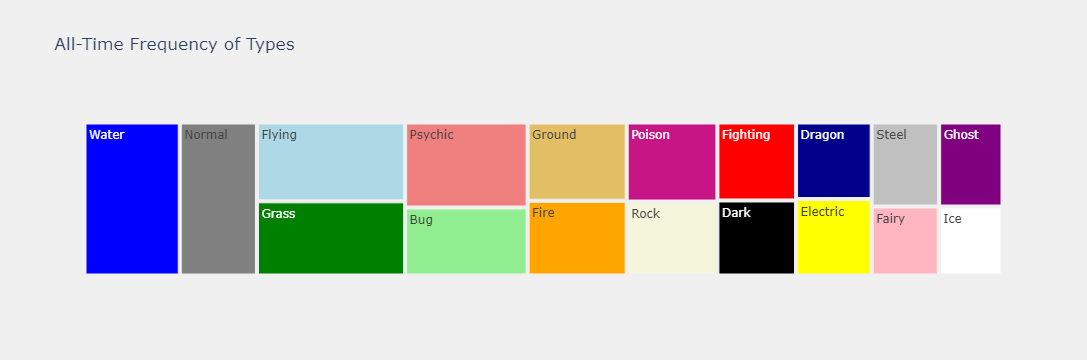

In [7]:
# Assuming type_frequencies is a DataFrame with columns 'index' and 'Frequency'
fig_treemap_types = px.treemap(type_frequencies, 
                 path=['index'],
                 values='Frequency',
                 color='index',
                 color_discrete_map=type_colors,
                 title='All-Time Frequency of Types')

# Hide the legend
fig_treemap_types.update_layout(legend=dict(title=dict(text='Type'), orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))
# Set background color for the entire figure
fig_treemap_types.update_layout(
    plot_bgcolor='rgb(240,240,240)',  # Background color of the plot area
    paper_bgcolor='rgb(240,240,240)'  # Background color of the entire figure
)
# Show the treemap with border
fig_treemap_types.show()

In [8]:
# Combine 'Type 1' and 'Type 2' into a single column
stacked_types = pd.concat([df['Type 1'], df['Type 2'].replace('None', '')])

# Create a DataFrame with the stacked types and count frequencies
type_counts = stacked_types.value_counts()
    

In [9]:
# Give me a dataset of each Generation and Types introduced
# Create DataFrames for 'Type 1' and 'Type 2' with 'Generation' column
df_type1 = df[['Type 1', 'Generation']].rename(columns={'Type 1': 'Type'})
df_type2 = df[['Type 2', 'Generation']].rename(columns={'Type 2': 'Type'})

# Concatenate the two DataFrames
stacked_types_generation = pd.concat([df_type1, df_type2.replace('None', '')])

# Calculate the frequency of each combination of 'Generation' and 'Type'
frequency_df = stacked_types_generation.groupby(['Generation', 'Type']).size().reset_index(name='Frequency')

# Pivot the DataFrame to have 'Type' as columns
pivot_df = frequency_df.pivot(index='Generation', columns='Type', values='Frequency').fillna(0)

# Display the result
#print(stacked_types_generation)

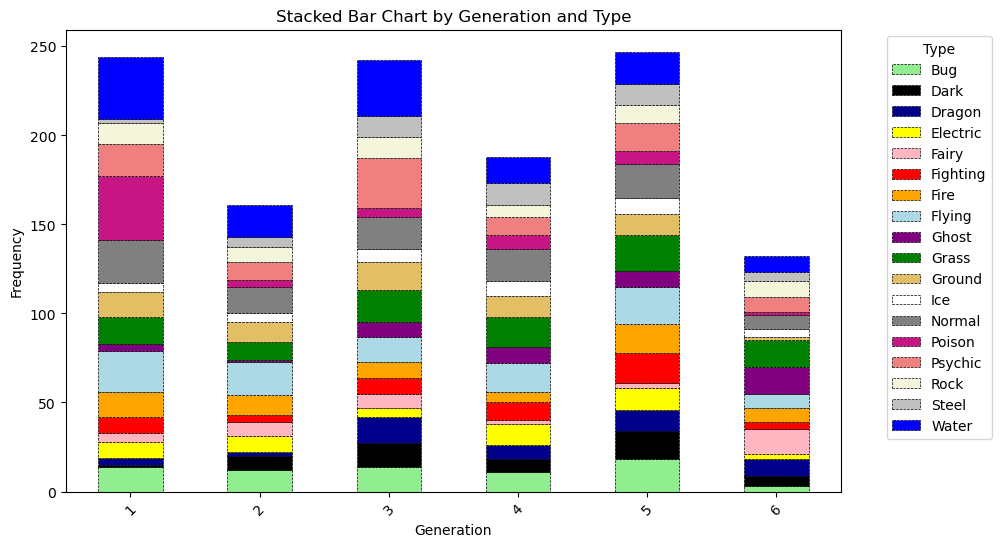

In [10]:
# Create a stacked bar chart with custom colors
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6),edgecolor="black", linestyle='dashed', linewidth=0.5, color=[type_colors.get(type, 'gray') for type in pivot_df.columns])

plt.title('Stacked Bar Chart by Generation and Type')
plt.xlabel('Generation')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
# Specify the legend outside the chart
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## In-Depth Pokémon Type Distribution Analysis with Bar Graphs and Treemaps
To understand the intricate distribution patterns of Pokémon types across generations, a dual approach was adopted, employing two stacked bar charts—one for actual values and another utilizing relative-fill. These charts collectively zeroed in on the nuanced aspects of distribution, offering insights into the variety and strategic possibilities in Pokémon battles.

In the Actual Values Stacked Bar chart, where the focus lies on Pokémon types rather than individual Pokémon, higher quantities signify a richer diversity and a broader spectrum of possibilities in battle scenarios. This aligns with the overarching trend observed in the All-Time distribution analysis, where the 'Water' typing consistently emerges as a prominent contributor, while other Pokémon types exhibit fluctuations in frequency over the generations.

Turning our attention to the Relative-Fill Stacked Bar chart, the contribution of 'Water' typing remains noticeable, yet a more distinct revelation unfolds— the 'Normal' typing emerges as a relative contributor in the distribution landscape. Notably, a discernible pattern surfaces, revealing that 'Dragon' and 'Steel' typings become more prevalent in later generations compared to their earlier counterparts.

To enhance the granularity of the distribution analysis, Treemaps were introduced, subplotted by generation. This strategic addition aids in dissecting the contributions of smaller subsets, providing a more comprehensive understanding of the distribution dynamics.

The comprehension of Pokémon type distribution across generations proves pivotal, particularly in the context of Pokémon tournaments with rules governing availability based on generation. This knowledge becomes a strategic asset, guiding trainers in selecting Pokémon types for their teams based on prevalence within a specific generation. In this way, understanding the distribution by generation becomes an invaluable tool for trainers seeking a competitive edge in the dynamic and ever-evolving world of Pokémon battles.




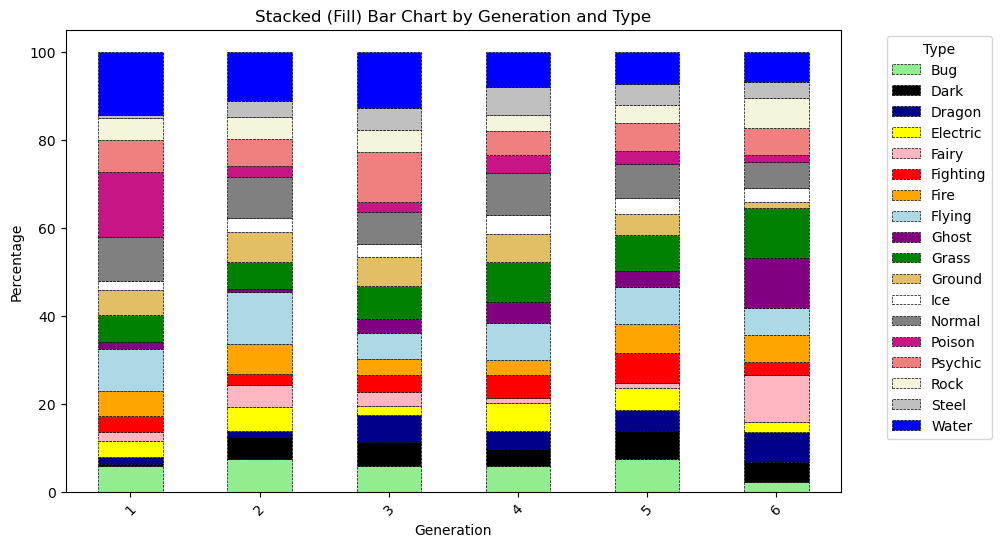

In [11]:

# Normalize the data to represent percentages
pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Create a stacked bar chart with custom colors
ax = pivot_df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[type_colors.get(type, 'gray') for type in pivot_df_percentage.columns], linestyle='dashed', linewidth=0.5, edgecolor='black')

plt.title('Stacked (Fill) Bar Chart by Generation and Type')
plt.xlabel('Generation')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Add a legend
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

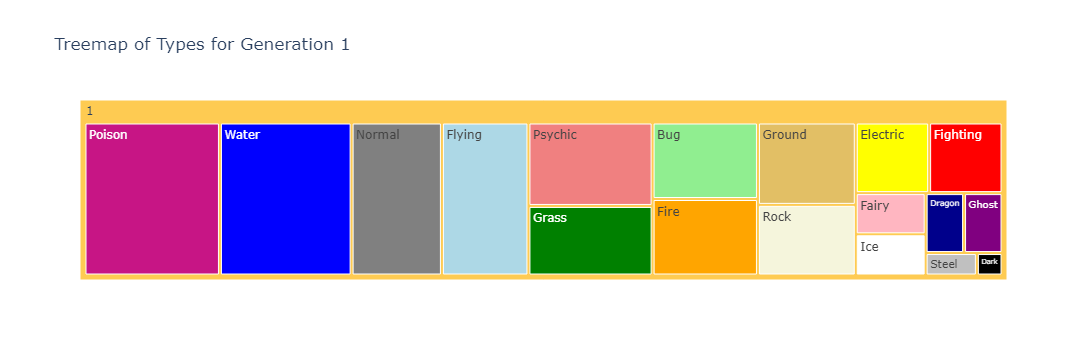

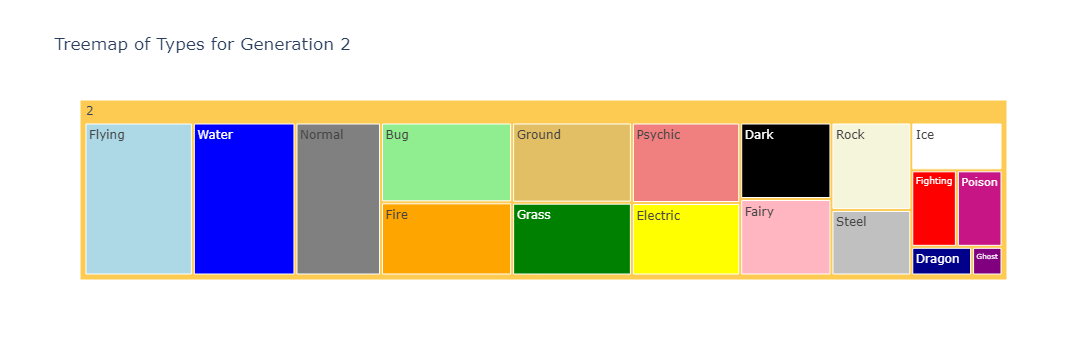

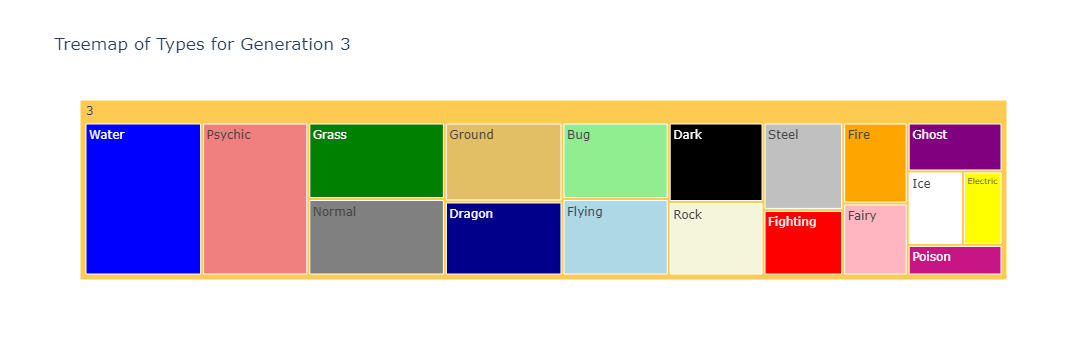

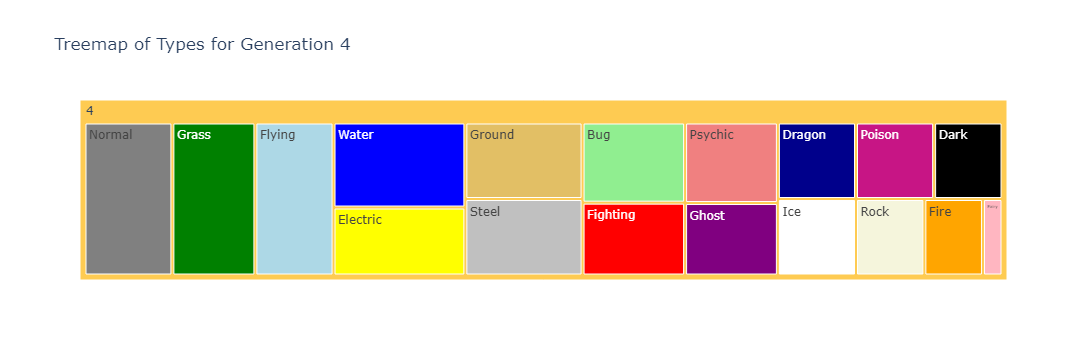

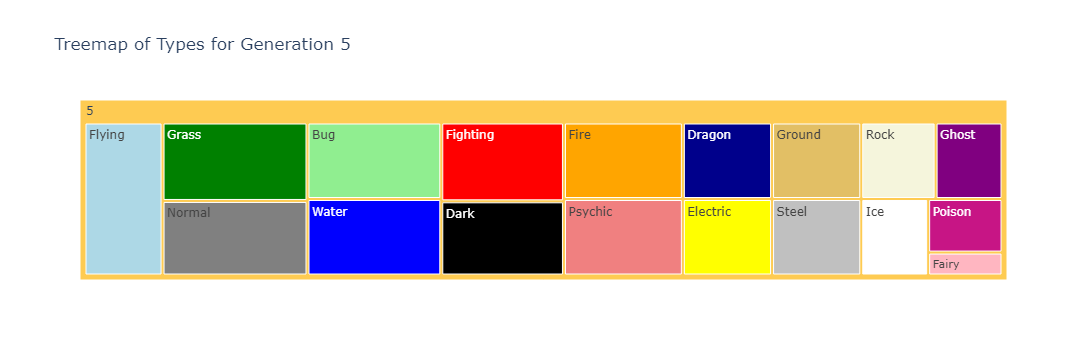

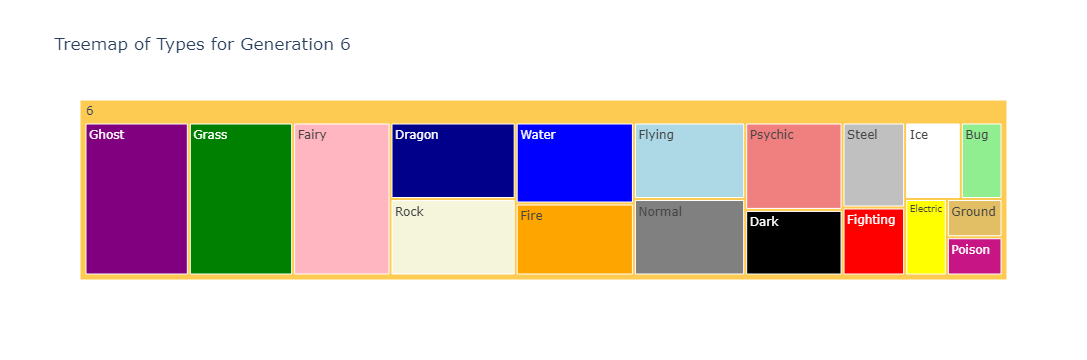

In [12]:
# Assuming stacked_types_generation is your DataFrame
df_count = stacked_types_generation.groupby(['Generation', 'Type']).size().reset_index(name='Count')

# Loop through each generation and create a treemap
for gen in df_count['Generation'].unique():
    # Filter the DataFrame for the current generation
    df_filtered = df_count[df_count['Generation'] == gen]

    # Create a treemap for the current generation
    fig = px.treemap(df_filtered,
                     path=['Generation', 'Type'],
                     values='Count',
                     title=f'Treemap of Types for Generation {gen}',
                     color='Type',
                     color_discrete_map=type_colors)

    # Show the figure
    fig.show()

In [13]:
# Assuming stacked_types_generation is your DataFrame
df_count = stacked_types_generation.groupby(['Generation', 'Type']).size().reset_index(name='Count')

# Sort the DataFrame by Generation and Type
df_count = df_count.sort_values(['Generation', 'Type'])

# Create an initial row for Generation 1 with variance 0 for each Type
initial_row = pd.DataFrame({'Generation': [1] * len(df_count['Type'].unique()), 'Type': df_count['Type'].unique(), 'Count': 0, 'Variance': 0})

# Concatenate the initial row with the original DataFrame
df_count = pd.concat([initial_row, df_count])

# Calculate the variance between consecutive generations
df_count['Variance'] = df_count.groupby('Type')['Count'].diff()
# Drop rows with NaN values (resulting from the diff operation)
df_count = df_count.dropna()

# Update Variance to 0 for rows where Generation is '1'
#df_count.loc[df_count['Generation'] == 1, 'Variance'] = 0

# Debugging
#df_count[df_count['Type'] == 'Water']

In [14]:
# Choose a specific Type for the waterfall chart
selected_type = 'Water'

# Filter the data for the selected Type
selected_type_data = df_count[df_count['Type'] == selected_type]


df_waterfall =selected_type_data
#df_waterfall

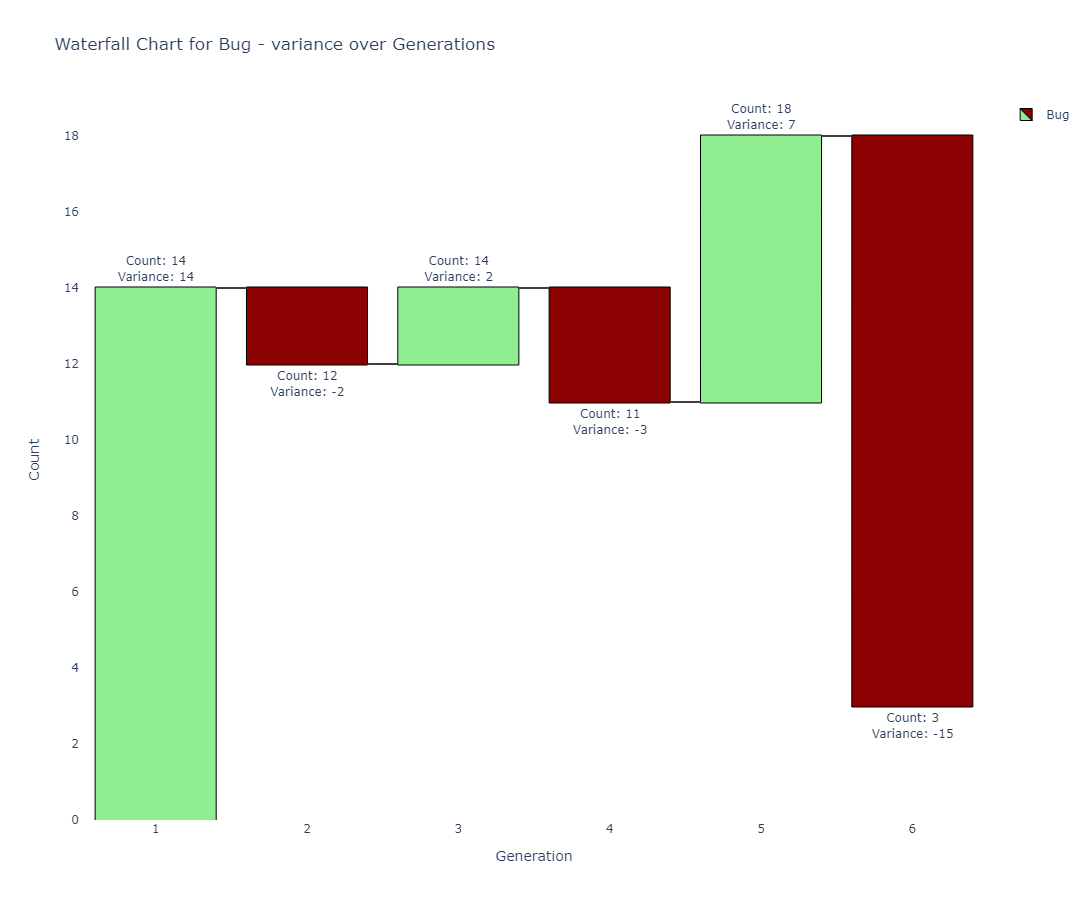

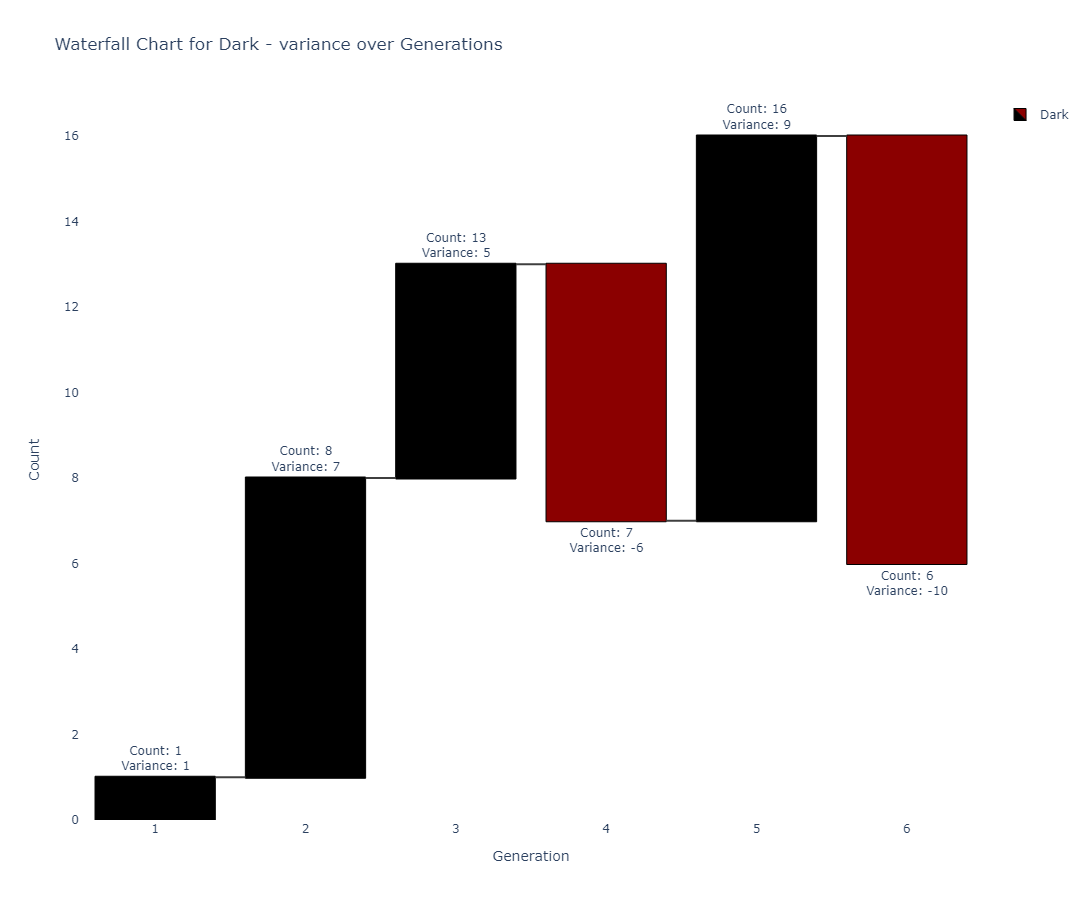

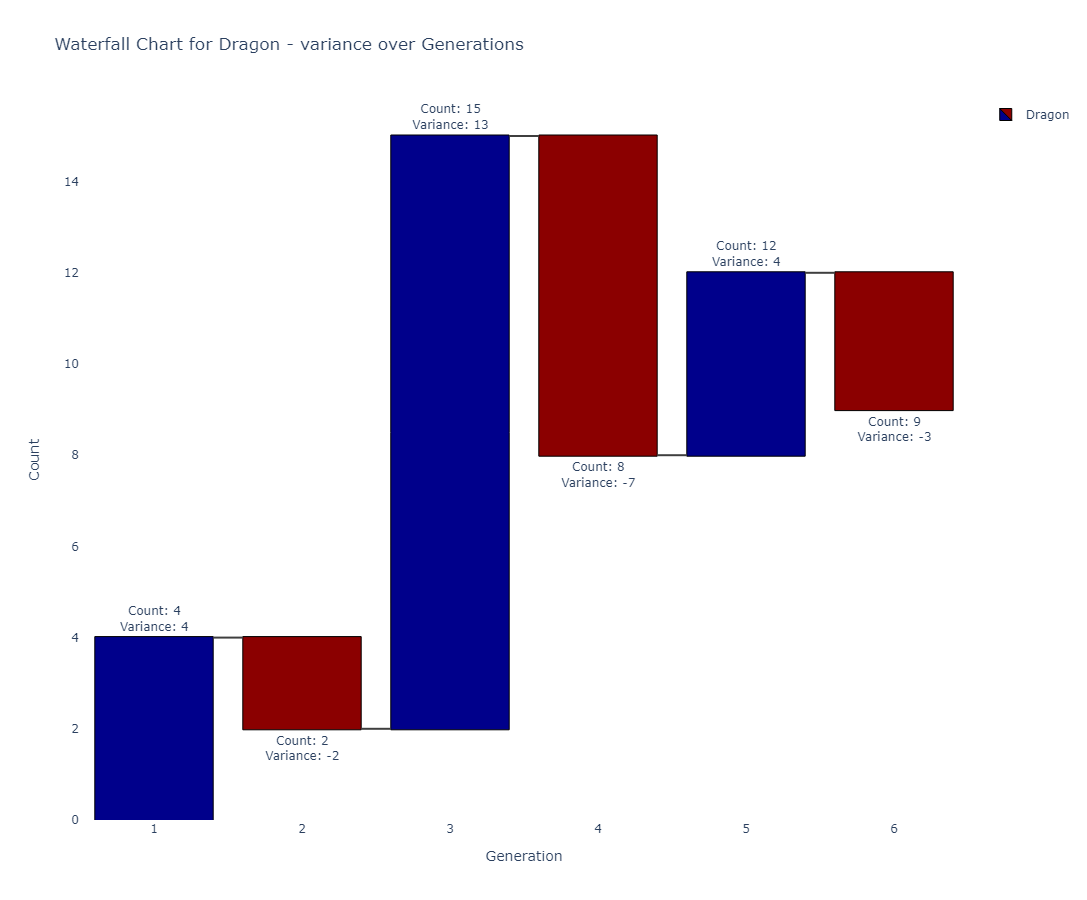

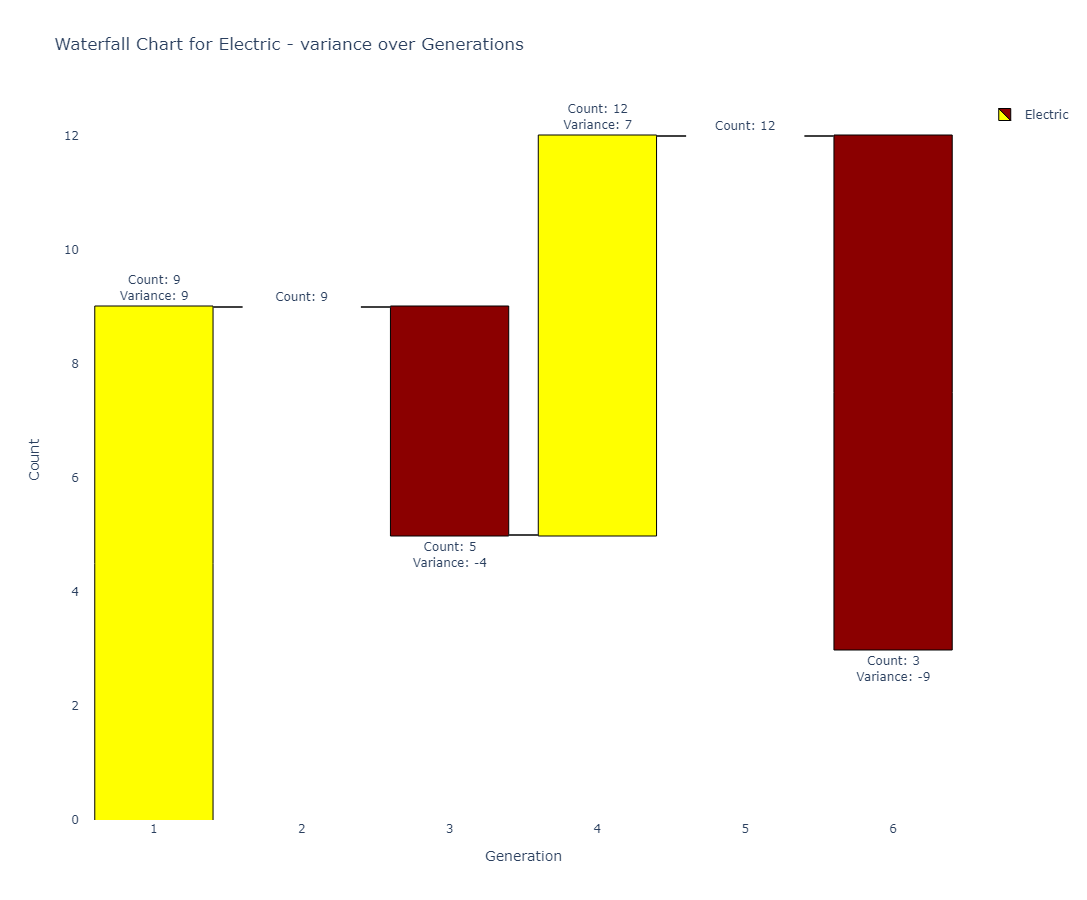

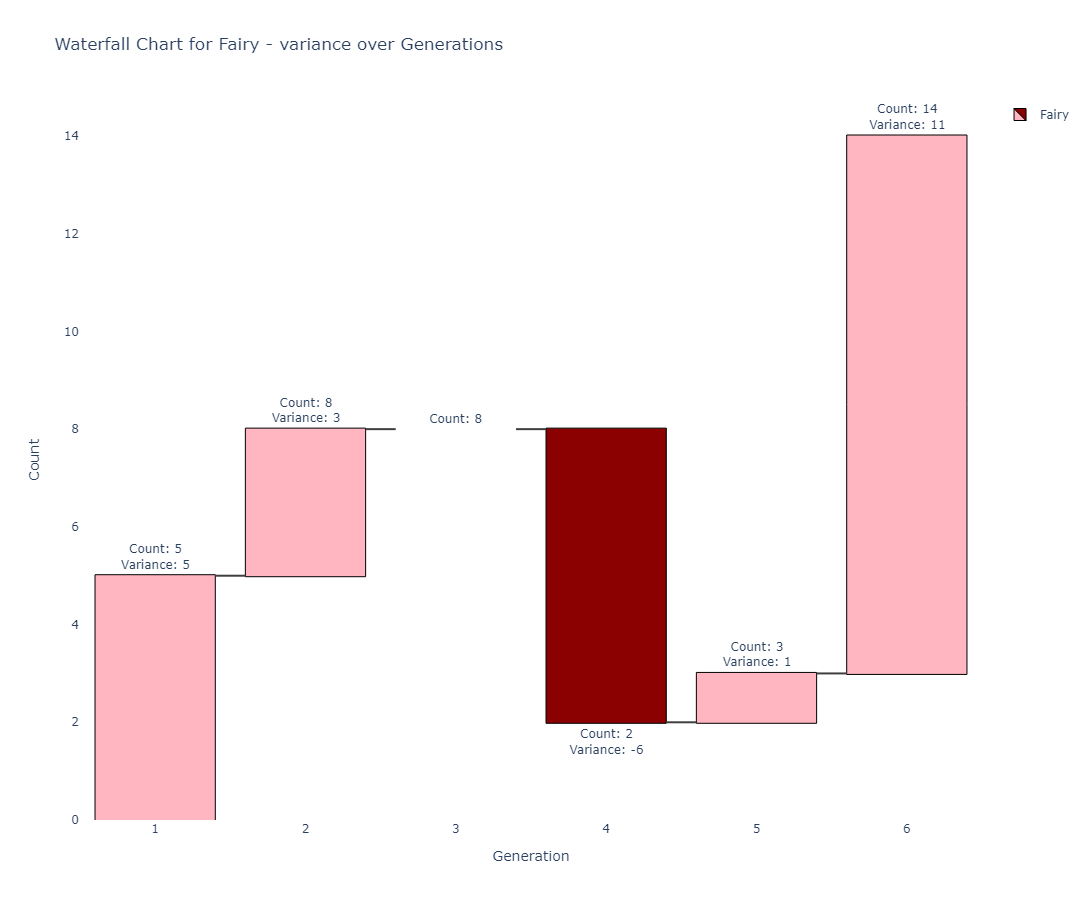

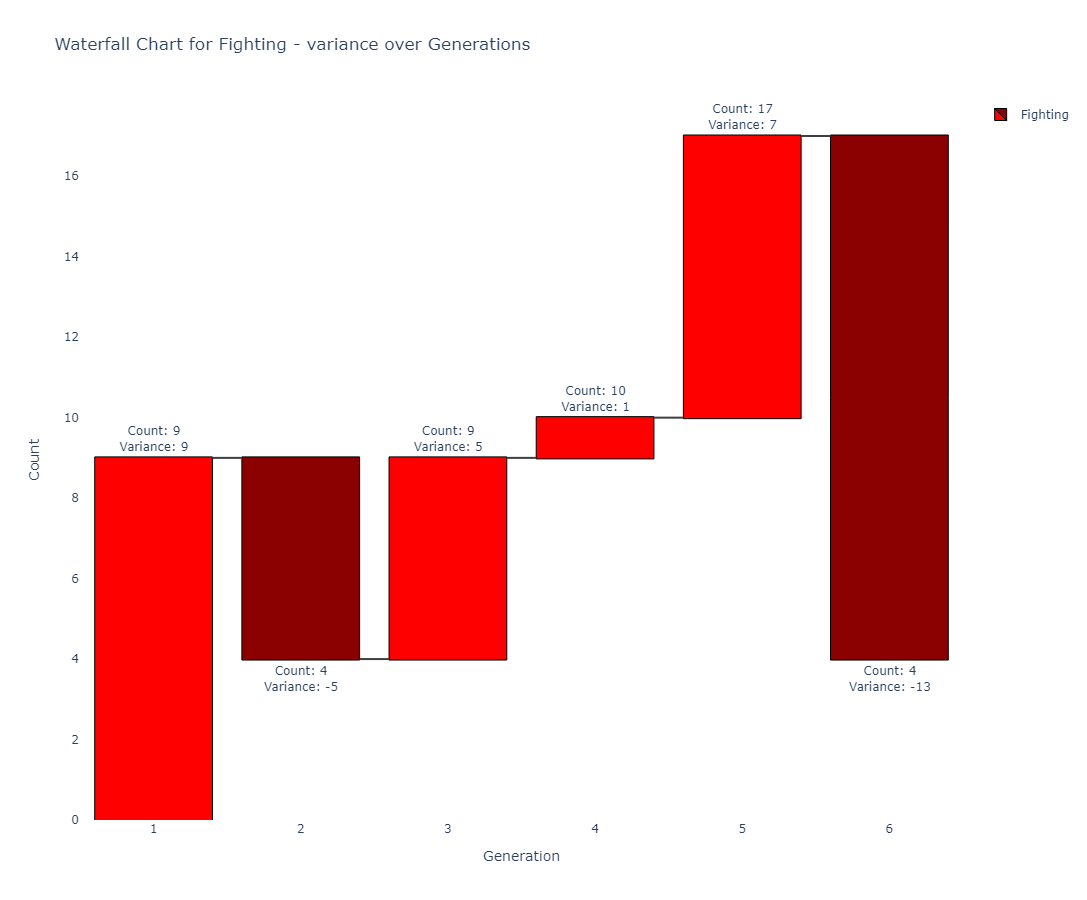

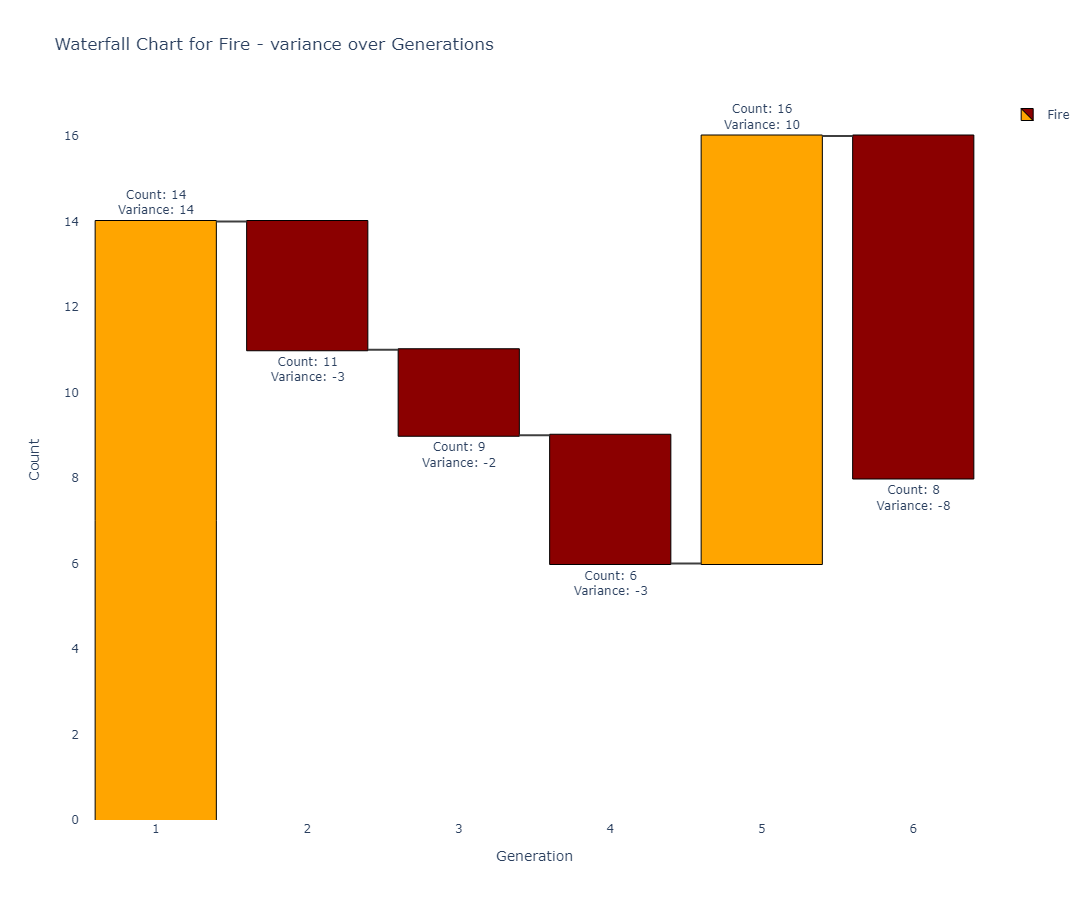

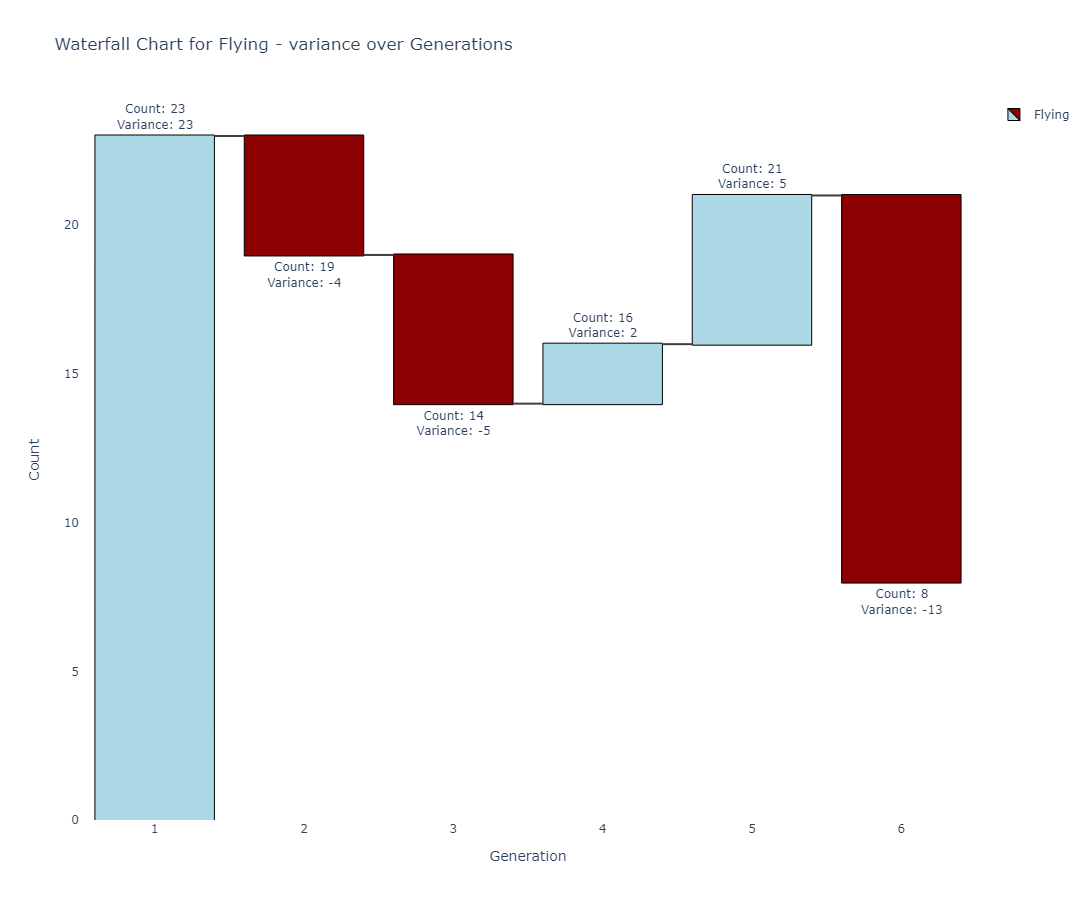

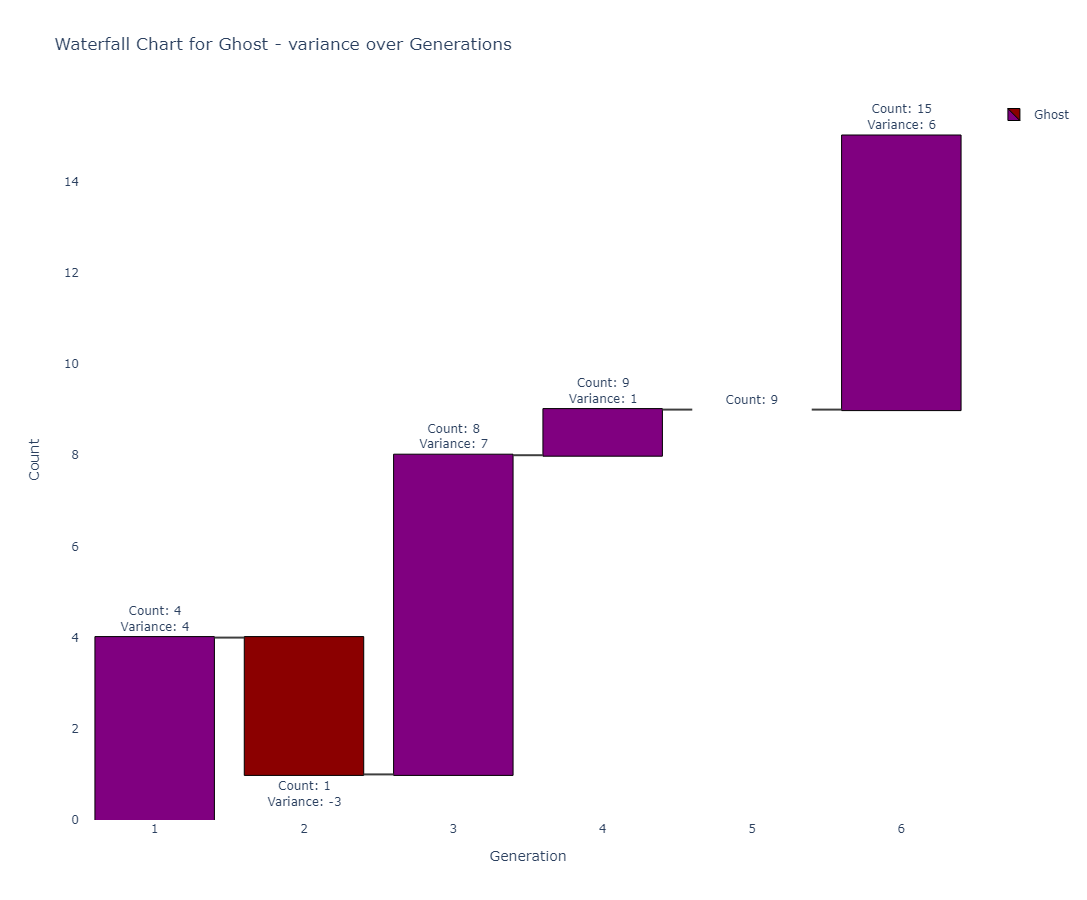

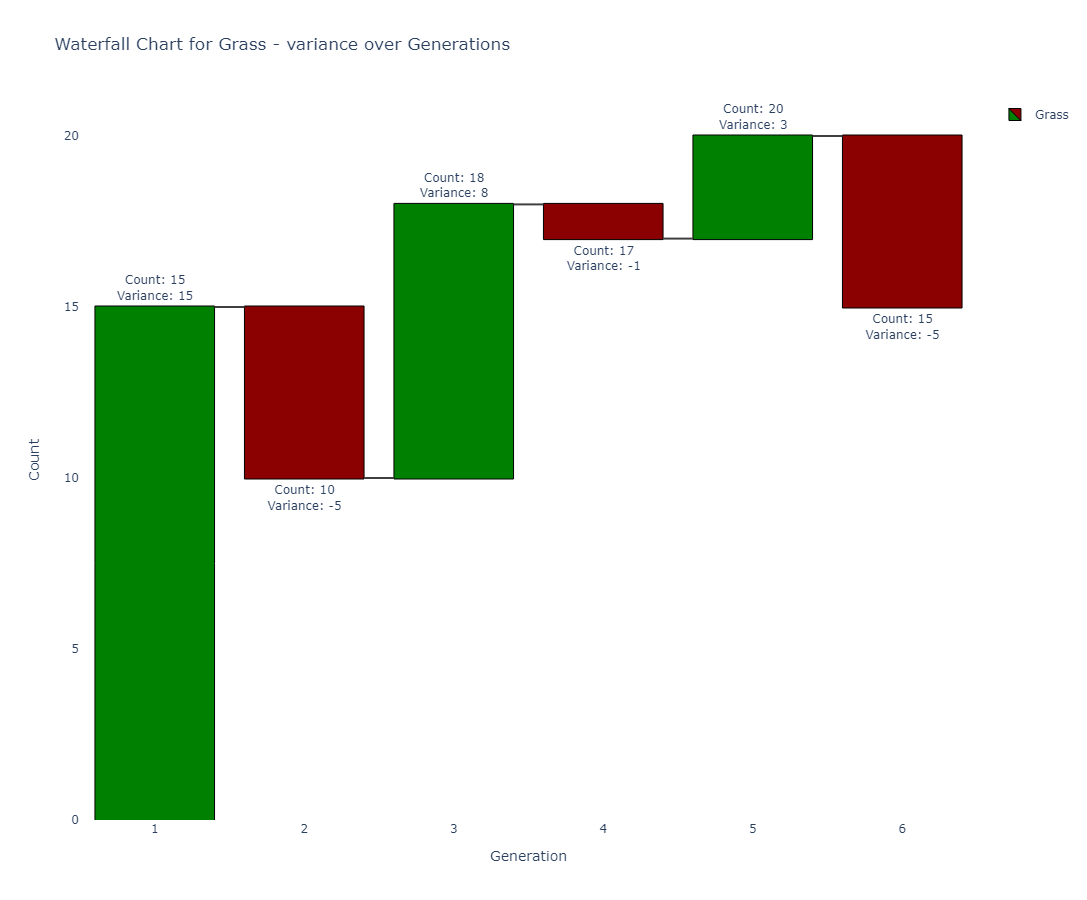

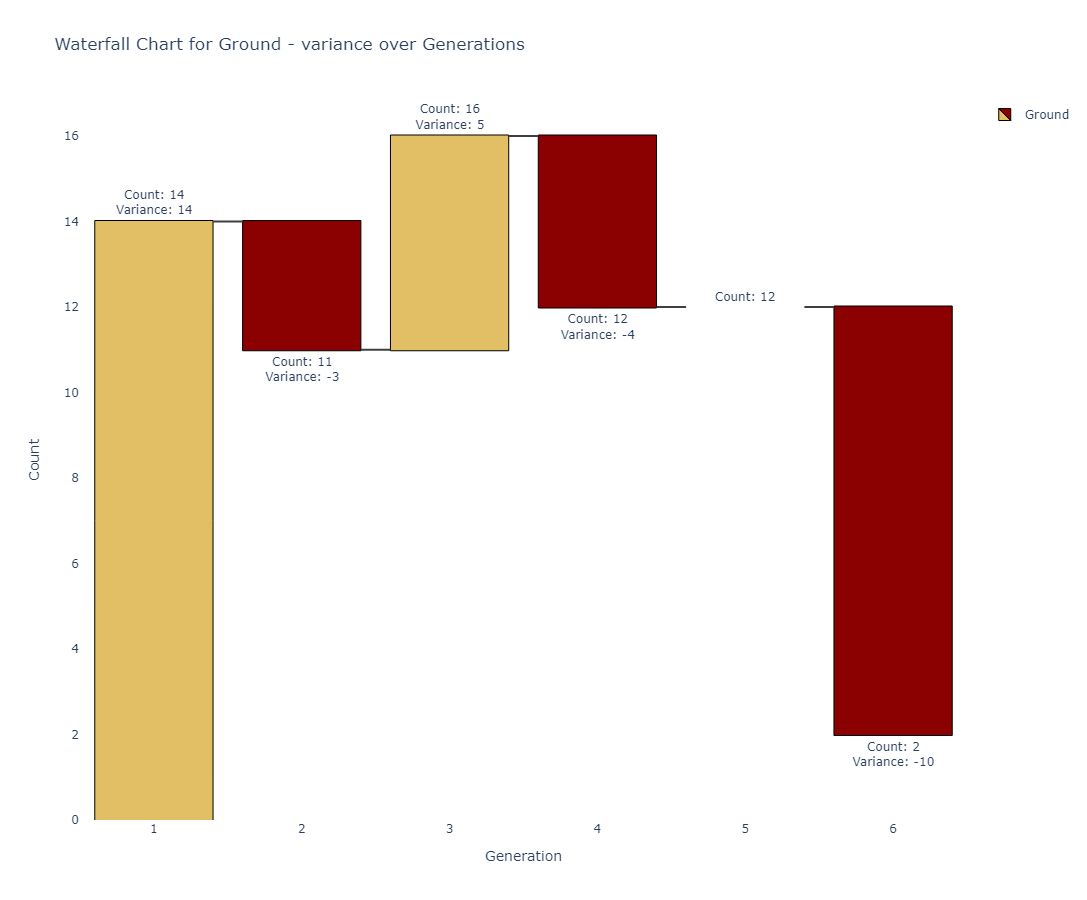

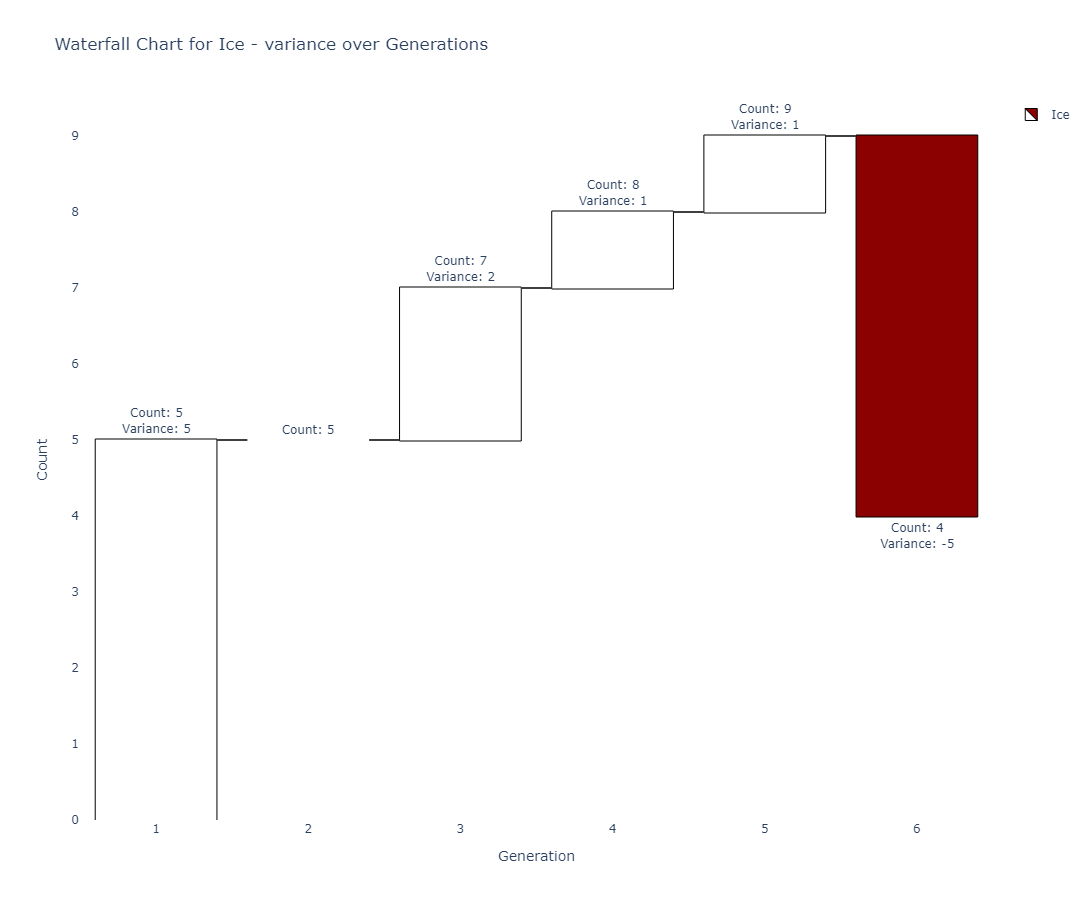

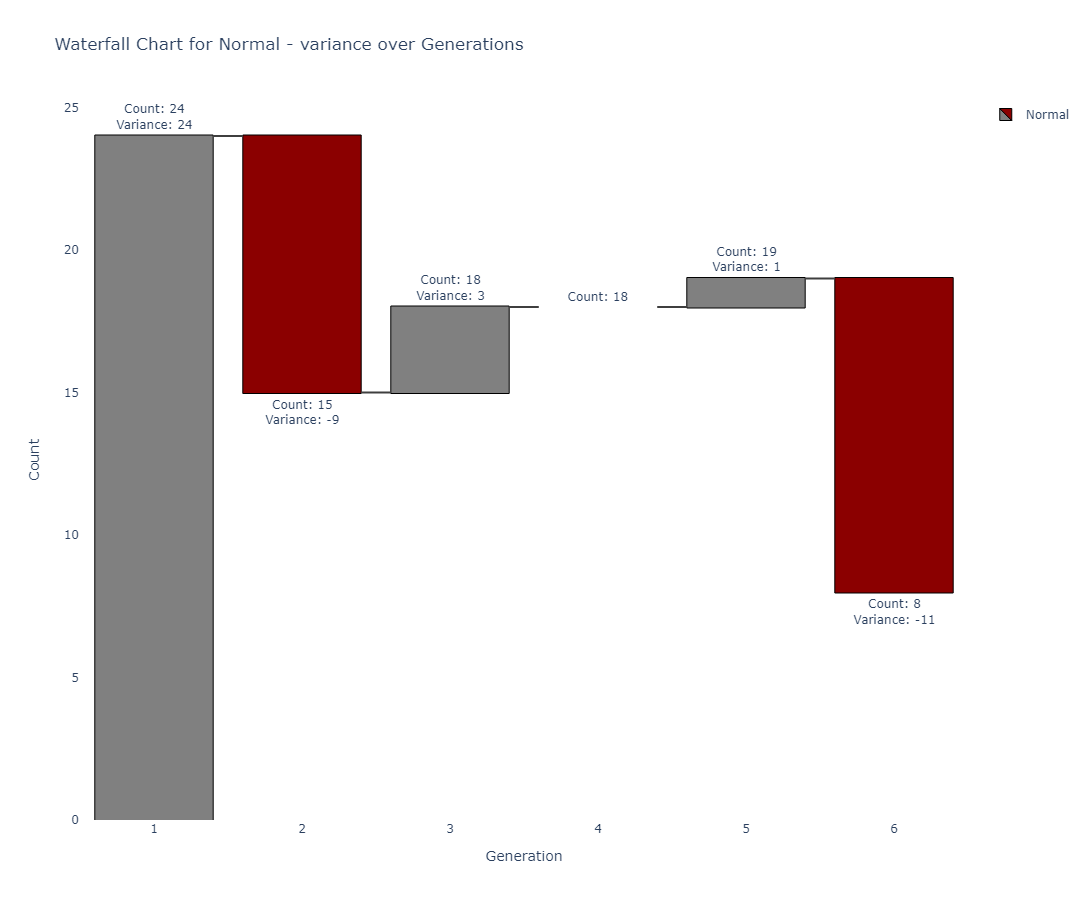

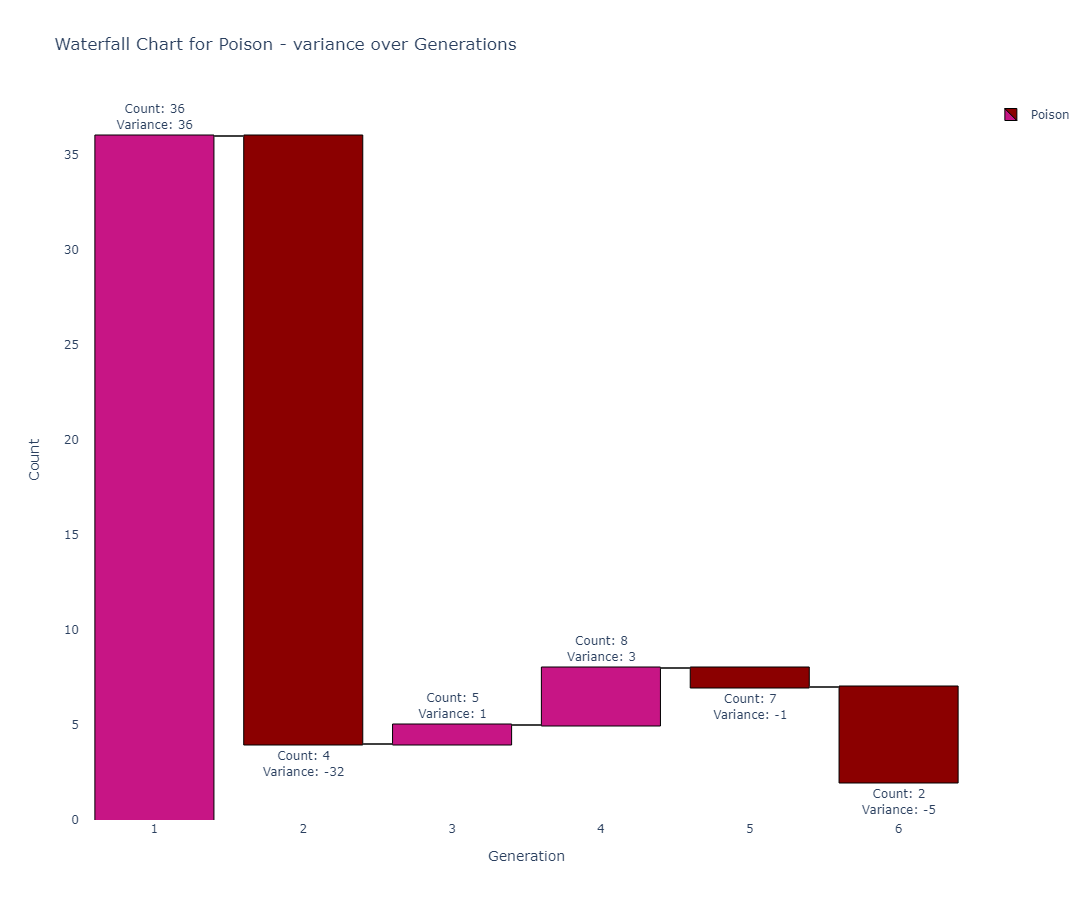

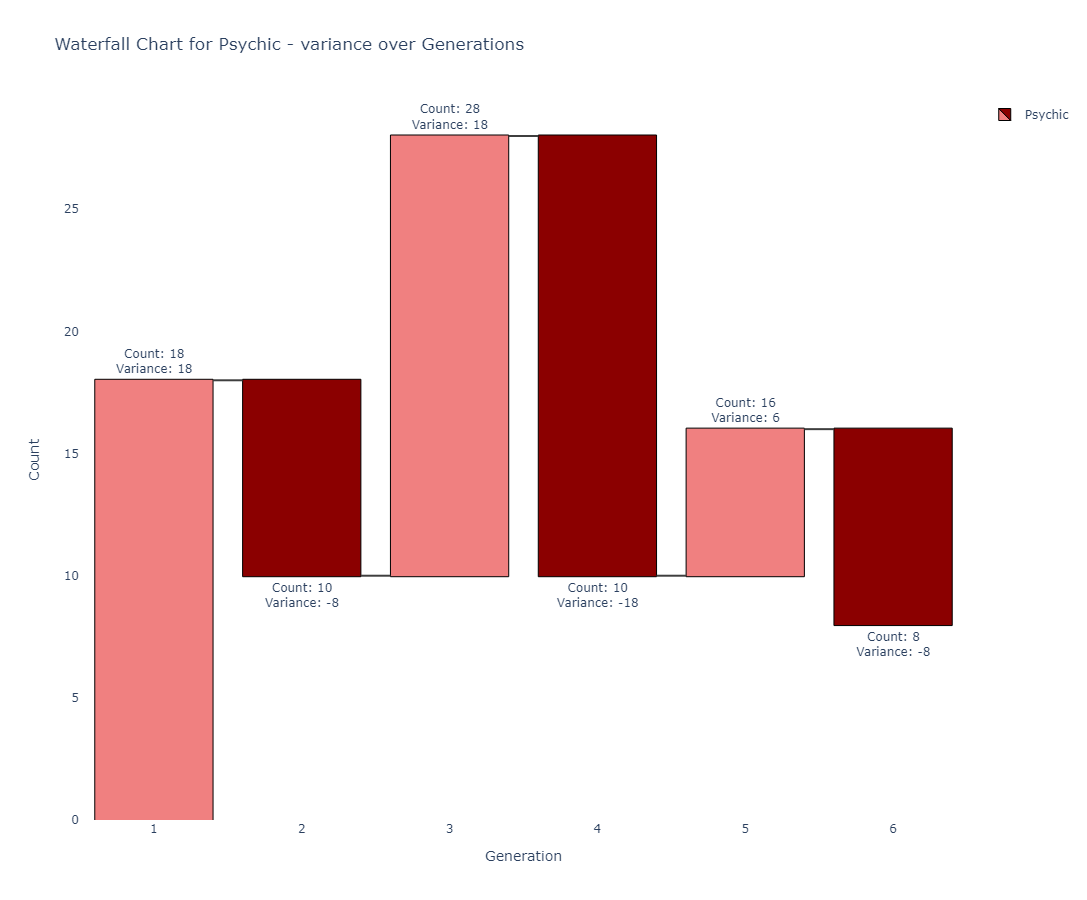

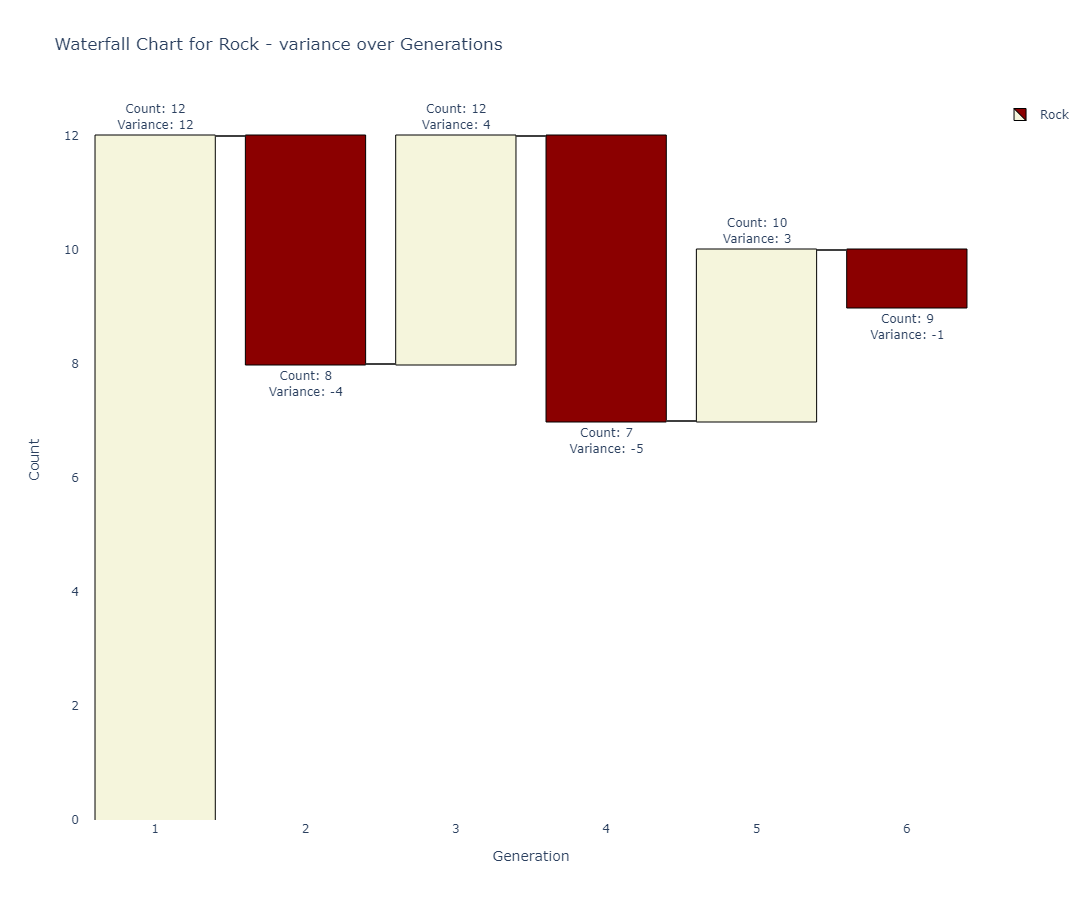

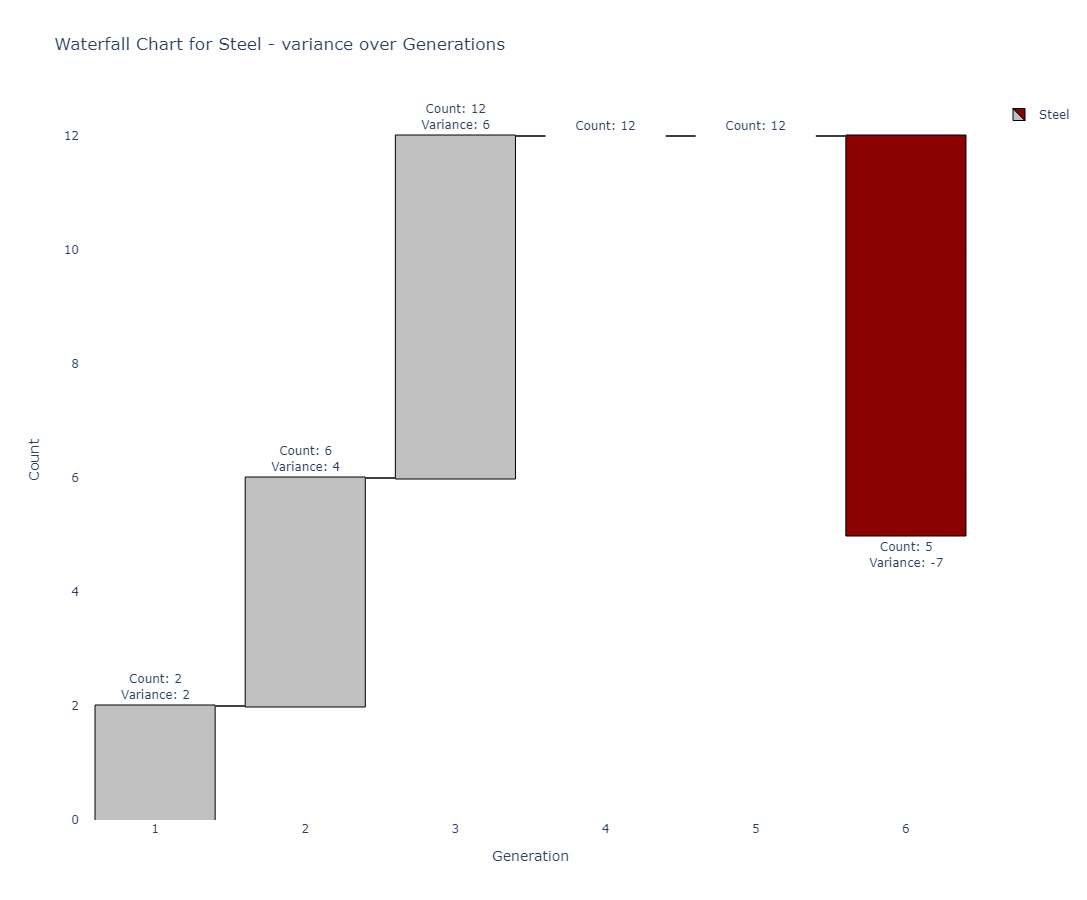

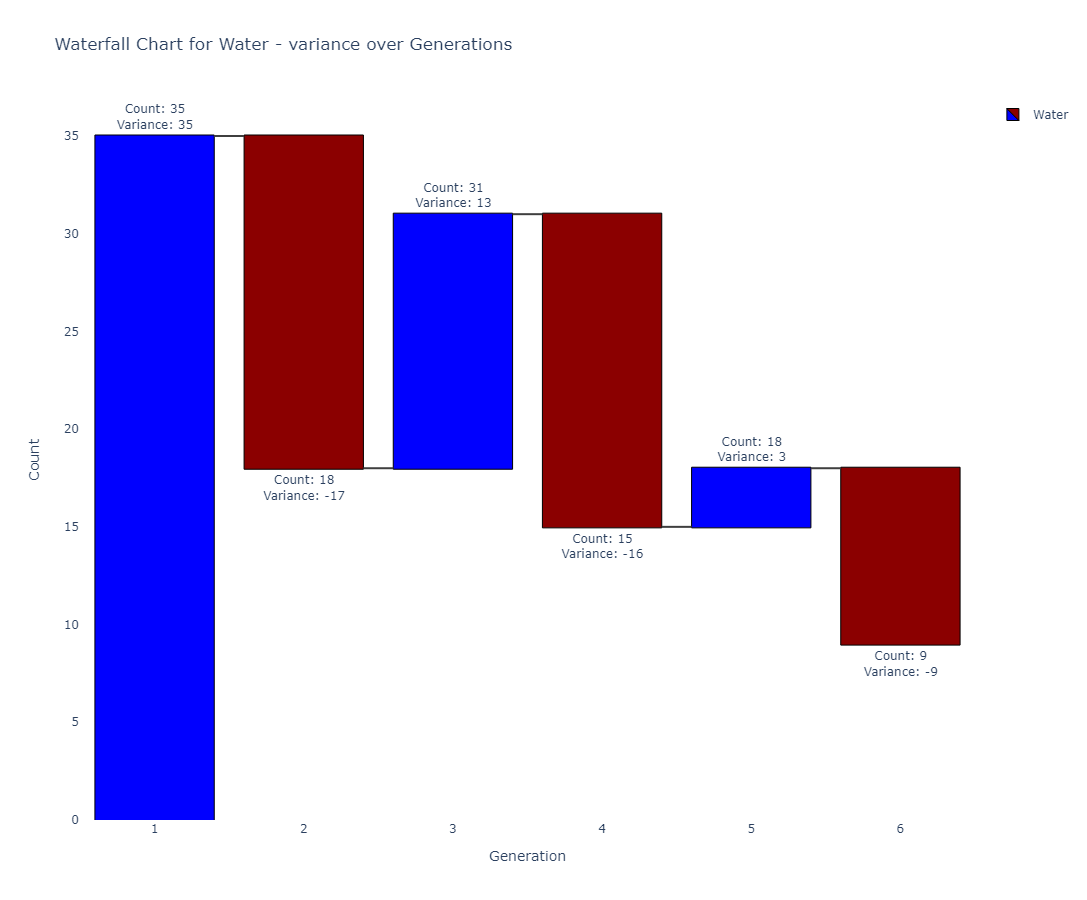

In [15]:
# Get unique types from df_count
unique_types = df_count['Type'].unique()

# Create a waterfall chart for each type
for selected_type in unique_types:
    # Filter the data for the selected Type
    selected_type_data = df_count[df_count['Type'] == selected_type]
    
    # Get the color for the selected type from type_colors
    type_color = type_colors.get(selected_type, 'gray')
    
    # Create a waterfall chart
    fig = go.Figure(go.Waterfall(
        name=selected_type,
        orientation="v",
        measure=selected_type_data['Variance'],
        x=selected_type_data['Generation'],
        textposition="outside",
        text=selected_type_data.apply(lambda row: f"Count: {int(row['Count'])}<br>Variance: {int(row['Variance'])}" if row['Variance'] != 0 else f"Count: {int(row['Count'])}",
                                axis=1),
        y=selected_type_data['Variance'],
        connector={"line": {"color": "rgb(63, 63, 63)"}},
        increasing=dict(marker=dict(color=type_color, line=dict(color='black', width=1))),
        decreasing=dict(marker=dict(color='darkred', line=dict(color='black', width=1))),
    ))

    # Update layout
    fig.update_layout(
        title=f"Waterfall Chart for {selected_type} - variance over Generations",
        showlegend=True,
        xaxis_title="Generation",
        yaxis_title="Count",
        paper_bgcolor='rgba(0, 0, 0, 0)',  # Set background color
        plot_bgcolor='rgba(0, 0, 0, 0)',  # Set plot area color
        height=900  # Set the desired height in pixels
    )

    # Show the figure
    fig.show()

##Analyzing Distribution Variances Across Generations with Waterfall Charts
Waterfall charts are used to visualize variance in distribution across Generations.
There are subplots by Pokémon Type as it was too noisy to attempt in a single visualization.
The only discernible pattern would be that Pokémon Types that were frequent in early Generations have a downward such as 'Water' and 'Normal', while the competitive Pokémon Typings that were bare have an upward rise such as 'Dragon' and 'Steel'.